<a href="https://colab.research.google.com/github/Adindalda041299/Analisa-Sentimen-Ulasan-di-Tokopedia/blob/main/Analisa_Sentimen_Ulasan_di_Tokopedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install openpyxl

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_excel("/content/tokped_text.xlsx", index_col=0)

data.head()

,Nama_Produk,Akun,Ulasan,rate,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,keduakali beli tapi sayang yang kedua lambat d...,3,"['keduakali', 'beli', 'tapi', 'sayang', 'yang'...","['kedua kali', 'beli', 'tapi', 'sayang', 'yang...","['kedua kali', 'beli', 'sayang', 'lambat', 're...","['dua kali', 'beli', 'sayang', 'lambat', 'resp...",dua kali beli sayang lambat respon order pagi ...
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus pengiriman cepat,5,"['bagus', 'pengiriman', 'cepat']","['bagus', 'pengiriman', 'cepat']","['bagus', 'pengiriman', 'cepat']","['bagus', 'kirim', 'cepat']",bagus kirim cepat
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesanan,4,"['barang', 'sesuai', 'pesanan']","['barang', 'sesuai', 'pesanan']","['barang', 'sesuai', 'pesanan']","['barang', 'sesuai', 'pesan']",barang sesuai pesan
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,agak panas pas dipakai,5,"['agak', 'panas', 'pas', 'dipakai']","['sedikit', 'panas', 'saat', 'dipakai']","['panas', 'dipakai']","['panas', 'pakai']",panas pakai
5,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai permintaan dan bagus namun komun...,3,"['barang', 'sesuai', 'permintaan', 'dan', 'bag...","['barang', 'sesuai', 'permintaan', 'dan', 'bag...","['barang', 'sesuai', 'permintaan', 'bagus', 'k...","['barang', 'sesuai', 'minta', 'bagus', 'komuni...",barang sesuai minta bagus komunikasi jual beli...


In [6]:
label = []
for index, row in data.iterrows():
    if row["rate"] == 5 or row["rate"] == 4:
        label.append(1)
    else:
        label.append(0)

data["label"] = label

data

,Nama_Produk,Akun,Ulasan,rate,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,keduakali beli tapi sayang yang kedua lambat d...,3,"['keduakali', 'beli', 'tapi', 'sayang', 'yang'...","['kedua kali', 'beli', 'tapi', 'sayang', 'yang...","['kedua kali', 'beli', 'sayang', 'lambat', 're...","['dua kali', 'beli', 'sayang', 'lambat', 'resp...",dua kali beli sayang lambat respon order pagi ...,0
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus pengiriman cepat,5,"['bagus', 'pengiriman', 'cepat']","['bagus', 'pengiriman', 'cepat']","['bagus', 'pengiriman', 'cepat']","['bagus', 'kirim', 'cepat']",bagus kirim cepat,1
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesanan,4,"['barang', 'sesuai', 'pesanan']","['barang', 'sesuai', 'pesanan']","['barang', 'sesuai', 'pesanan']","['barang', 'sesuai', 'pesan']",barang sesuai pesan,1
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,agak panas pas dipakai,5,"['agak', 'panas', 'pas', 'dipakai']","['sedikit', 'panas', 'saat', 'dipakai']","['panas', 'dipakai']","['panas', 'pakai']",panas pakai,1
5,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai permintaan dan bagus namun komun...,3,"['barang', 'sesuai', 'permintaan', 'dan', 'bag...","['barang', 'sesuai', 'permintaan', 'dan', 'bag...","['barang', 'sesuai', 'permintaan', 'bagus', 'k...","['barang', 'sesuai', 'minta', 'bagus', 'komuni...",barang sesuai minta bagus komunikasi jual beli...,0
...,...,...,...,...,...,...,...,...,...,...
296,Buy 1 Get 1 - Masker Primero - Sachet,a***a,barang yg dikirim tdk sesuai deskripsi tidak t...,1,"['barang', 'yg', 'dikirim', 'tdk', 'sesuai', '...","['barang', 'yang', 'dikirim', 'tidak', 'sesuai...","['barang', 'dikirim', 'sesuai', 'deskripsi', '...","['barang', 'kirim', 'sesuai', 'deskripsi', 'te...",barang kirim sesuai deskripsi tera ijin kemenk...,0
297,Buy 1 Get 1 - Masker Primero - Sachet,Teguh,kotaknya penyok disana sini mngkn dr pihak exp...,5,"['kotaknya', 'penyok', 'disana', 'sini', 'mngk...","['kotaknya', 'penyok', 'disana', 'sini', 'mngk...","['kotaknya', 'penyok', 'disana', 'mngkn', 'exp...","['kotak', 'penyok', 'sana', 'mngkn', 'expediai']",kotak penyok sana mngkn expediai,1
298,Buy 1 Get 1 - Masker Primero - Sachet,F***a,barang sesuai dan kualitas baik cuma kardusnya...,5,"['barang', 'sesuai', 'dan', 'kualitas', 'baik'...","['barang', 'sesuai', 'dan', 'kualitas', 'baik'...","['barang', 'sesuai', 'kualitas', 'kardusnya', ...","['barang', 'sesuai', 'kualitas', 'kardus', 'pe...",barang sesuai kualitas kardus penyok next time...,1
299,Buy 1 Get 1 - Masker Primero - Sachet,N***a,dapet harga promo jadi murah pengiriman agak l...,5,"['dapet', 'harga', 'promo', 'jadi', 'murah', '...","['dapat', 'harga', 'promo', 'jadi', 'murah', '...","['harga', 'promo', 'murah', 'pengiriman', 'pro...","['harga', 'promo', 'murah', 'kirim', 'promo']",harga promo murah kirim promo,1


In [7]:
data["label"].value_counts()

1    270
0     30
Name: label, dtype: int64

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [10]:
Ulasan = data['Ulasan_clean']

In [11]:
Ulasan.isnull().sum()

11

In [12]:
Ulasan = Ulasan.fillna('tidak ada komentar')

In [13]:
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

468


In [14]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata

{'abal': 0,
 'ada': 1,
 'admin': 2,
 'affordable': 3,
 'aktif': 4,
 'akurat': 5,
 'alhamdulillah': 6,
 'alias': 7,
 'aman': 8,
 'amanseller': 9,
 'amburadul': 10,
 'an': 11,
 'anak': 12,
 'anakanak': 13,
 'and': 14,
 'andal': 15,
 'anjas': 16,
 'apa': 17,
 'asa': 18,
 'asli': 19,
 'ati': 20,
 'auto': 21,
 'awet': 22,
 'bada': 23,
 'bagus': 24,
 'baguz': 25,
 'bahan': 26,
 'baik': 27,
 'baju': 28,
 'banding': 29,
 'bandung': 30,
 'banget': 31,
 'bangetdapet': 32,
 'banyak': 33,
 'barang': 34,
 'bareng': 35,
 'barokah': 36,
 'bayang': 37,
 'beda': 38,
 'belanja': 39,
 'beli': 40,
 'berat': 41,
 'besar': 42,
 'besi': 43,
 'besok': 44,
 'better': 45,
 'bgtthank': 46,
 'biar': 47,
 'bini': 48,
 'bintang': 49,
 'bolong': 50,
 'bonus': 51,
 'bos': 52,
 'bosssku': 53,
 'box': 54,
 'boxnya': 55,
 'brgnya': 56,
 'brng': 57,
 'btw': 58,
 'bubble': 59,
 'bubblewrap': 60,
 'buka': 61,
 'bunafit': 62,
 'bunda': 63,
 'bungkus': 64,
 'cancel': 65,
 'cashback': 66,
 'cepat': 67,
 'cerita': 68,
 'chatda

In [15]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 24)	1
  (0, 34)	1
  (0, 40)	1
  (0, 44)	1
  (0, 100)	1
  (0, 128)	1
  (0, 148)	1
  (0, 167)	1
  (0, 191)	2
  (0, 207)	1
  (0, 293)	1
  (0, 304)	1
  (0, 357)	3
  (0, 374)	1
  (0, 389)	1
  (0, 400)	1
  (1, 24)	1
  (1, 67)	1
  (1, 191)	1
  (2, 34)	1
  (2, 318)	1
  (2, 389)	1
  (3, 305)	1
  (3, 308)	1
  (4, 4)	1
  :	:
  (299, 8)	1
  (299, 17)	1
  (299, 24)	1
  (299, 40)	2
  (299, 59)	1
  (299, 71)	1
  (299, 76)	1
  (299, 107)	1
  (299, 143)	1
  (299, 191)	1
  (299, 200)	2
  (299, 243)	1
  (299, 248)	1
  (299, 253)	1
  (299, 300)	1
  (299, 305)	1
  (299, 307)	1
  (299, 311)	1
  (299, 316)	1
  (299, 336)	1
  (299, 367)	1
  (299, 375)	1
  (299, 421)	1
  (299, 463)	1
  (299, 464)	1


In [16]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

dua kali beli sayang lambat respon order pagi kirim sore respon respon itu kirim besok barang bagus sesuai harga


In [17]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 24)	1
  (0, 34)	1
  (0, 40)	1
  (0, 44)	1
  (0, 100)	1
  (0, 128)	1
  (0, 148)	1
  (0, 167)	1
  (0, 191)	2
  (0, 207)	1
  (0, 293)	1
  (0, 304)	1
  (0, 357)	3
  (0, 374)	1
  (0, 389)	1
  (0, 400)	1


In [18]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[6.01396308 4.22220361 5.60849798 6.01396308 5.60849798 6.01396308
 6.01396308 6.01396308 4.06805294 6.01396308 6.01396308 6.01396308
 5.3208159  6.01396308 6.01396308 6.01396308 5.60849798 6.01396308
 6.01396308 5.09767235 6.01396308 6.01396308 6.01396308 6.01396308
 2.50241765 6.01396308 4.9153508  5.3208159  6.01396308 5.3208159
 6.01396308 3.61606781 6.01396308 6.01396308 2.36330484 5.60849798
 6.01396308 6.01396308 5.3208159  5.09767235 3.27312306 6.01396308
 6.01396308 6.01396308 5.3208159  6.01396308 6.01396308 6.01396308
 6.01396308 6.01396308 6.01396308 4.62766872 6.01396308 6.01396308
 4.76120012 6.01396308 6.01396308 5.60849798 6.01396308 4.76120012
 6.01396308 5.3208159  6.01396308 6.01396308 5.09767235 6.01396308
 6.01396308 2.40304517 6.01396308 6.01396308 6.01396308 5.60849798
 5.60849798 6.01396308 5.60849798 6.01396308 5.3208159  6.01396308
 6.01396308 6.01396308 5.60849798 6.01396308 6.01396308 5.60849798
 5.09767235 5.60849798 4.22220361 6.01396308 6.01396308 6.01396

In [19]:
data_label = data[["Nama_Produk", "Akun", "Ulasan_clean", "label"]]

In [20]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
data_label.to_excel("/content/data_label.xlsx")

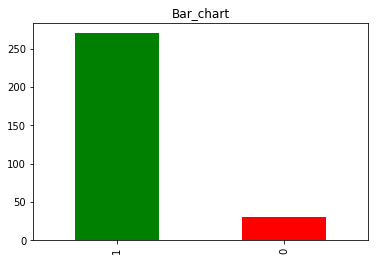

In [22]:
sentimen_data=pd.value_counts(data_label["label"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red"])
plt.title('Bar_chart')
plt.show()

In [23]:
from wordcloud import WordCloud

In [24]:
train_s0 = data_label[data_label["label"] == 0]

In [26]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
train_s0

,Nama_Produk,Akun,Ulasan_clean,label
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,dua kali beli sayang lambat respon order pagi ...,0
5,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai minta bagus komunikasi jual beli...,0
9,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,n***l,proses barang jemput kurir banget anjas pokok,0
14,MASKER 3PLY IZIN KEMENKES MASKER MEDIS KESEHAT...,Renold,kecewa berat masker hijab warna hitam tali mas...,0
16,MASKER 3PLY IZIN KEMENKES MASKER MEDIS KESEHAT...,Ridwan,karet headloop nya pendek istri pakai untung anak,0
36,Masker Evo PlusMed 4d Medis - Putih,J***a,pesan masker warna hijau datang warna pink,0
57,Disposable Mask KN95 N95 Facemask Kesehatan Ma...,Anggia,bungkus plastik sealed debu kotor,0
85,ONEMED - Masker Karet 3 Ply / Masker Non-Medis...,Adhi,tipis sih ragu banding type jenis ply ply,0
104,C care Duckbill 3D Stereo 3 Ply Isi 50 Pcs Mas...,Risca,masker tipis ya bunda,0
116,Masker KN95 Alkindo Masker Medis 5ply 1 Box 10...,Duarte,kualitas masker jelek masker bolong jahit isi ...,0


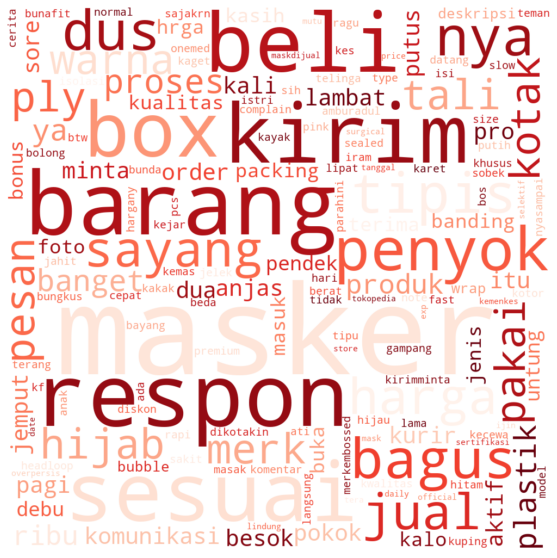

In [28]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()